In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_categorical = pd.read_csv('/content/drive/MyDrive/Training.csv', dtype="category")
data = pd.read_csv('/content/drive/MyDrive/Training.csv')

# **DATA VISUALIZATION**

In [ ]:
print("Data Shape: ", data.shape)

Data Shape:  (824579, 10)


In [ ]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,02/11/2020,0,0,0,0,0,0,male,Other,0
1,08/11/2020,0,0,0,0,0,0,male,Other,0
2,06/10/2020,0,0,0,0,0,0,female,Other,0
3,13/09/2020,0,0,0,0,0,0,male,Other,0
4,23/09/2020,0,0,0,0,0,0,male,Other,0
...,...,...,...,...,...,...,...,...,...,...
824574,23/09/2020,0,0,0,0,0,0,female,Other,1
824575,14/09/2020,0,0,0,0,0,0,female,Other,1
824576,25/09/2020,0,0,0,0,1,0,male,Other,1
824577,29/09/2020,0,0,0,0,0,0,male,Contact with confirmed,1


In [ ]:
print("Number of null values in the dataset:", data.isnull().sum(), sep="\n")

Number of null values in the dataset:
test_date                 0
cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
age_60_and_above          0
gender                 2101
test_indication           0
corona_result             0
dtype: int64


In [ ]:
print("Description of dataset:")
data_categorical.describe()

Description of dataset:


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
count,824579,824579,824579,824579,824579,824579,824579,822478,824579,824579
unique,64,2,2,2,2,2,3,2,3,2
top,17/09/2020,0,0,0,0,0,0,female,Other,0
freq,28558,802537,802182,817206,822363,809040,679302,422583,771313,740232


In [ ]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,02/11/2020,0,0,0,0,0,0,male,Other,0
1,08/11/2020,0,0,0,0,0,0,male,Other,0
2,06/10/2020,0,0,0,0,0,0,female,Other,0
3,13/09/2020,0,0,0,0,0,0,male,Other,0
4,23/09/2020,0,0,0,0,0,0,male,Other,0


In [ ]:
for i in data_categorical.columns[1:]:
  print(data_categorical[i].value_counts(), "\n")

0    802537
1     22042
Name: cough, dtype: int64 

0    802182
1     22397
Name: fever, dtype: int64 

0    817206
1      7373
Name: sore_throat, dtype: int64 

0    822363
1      2216
Name: shortness_of_breath, dtype: int64 

0    809040
1     15539
Name: head_ache, dtype: int64 

0    679302
1    104337
_     40940
Name: age_60_and_above, dtype: int64 

female    422583
male      399895
Name: gender, dtype: int64 

Other                     771313
Contact with confirmed     52109
Abroad                      1157
Name: test_indication, dtype: int64 

0    740232
1     84347
Name: corona_result, dtype: int64 



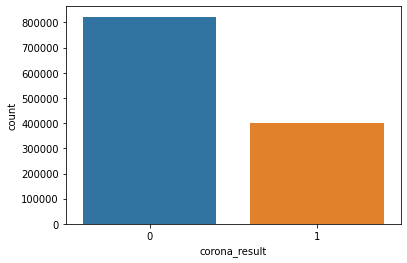

In [ ]:
for i in data_categorical.columns[1:]:
  sns.countplot(x=i, data=data_categorical)

The test_date column is dropped from the dataset as this feature will not be utilized to predict the corona result.

In [ ]:
data_categorical = data_categorical.drop(columns='test_date')
data = data.drop(columns='test_date')

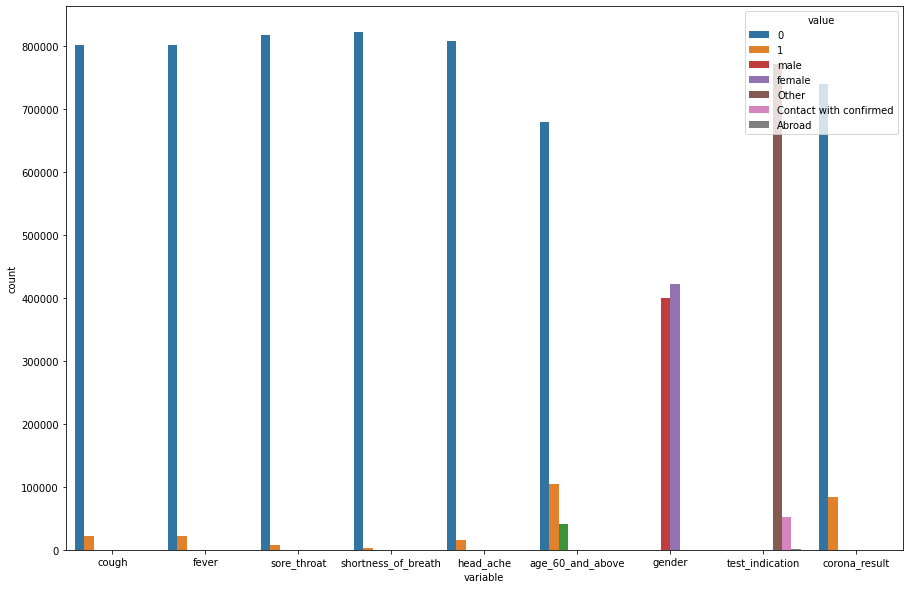

In [ ]:
df = pd.melt(data_categorical)
plt.figure(figsize=(15,10))
sns.countplot(data=df.loc[df['value']!="NO"], x='variable', hue='value')

# **DATA PREPROCESSING**

Since the dataset deals with a medical issue such as COVID-19, it is optimal to discard the data points that contain missing values.

The dataset duplicates, if any, should not be dropped as they add information to the dataset. It is a medical dataset so duplicate information is important and cannot be dropped.

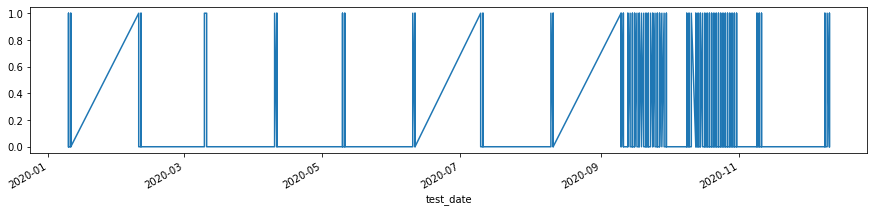

In [ ]:
# from datetime import datetime, timedelta
# import random

dates = pd.read_csv('/content/drive/MyDrive/Training.csv', parse_dates=['test_date'])

dates.index = pd.to_datetime(dates['test_date'])
dates = dates['corona_result']
ax = dates.plot(kind='line',figsize=(15,3))

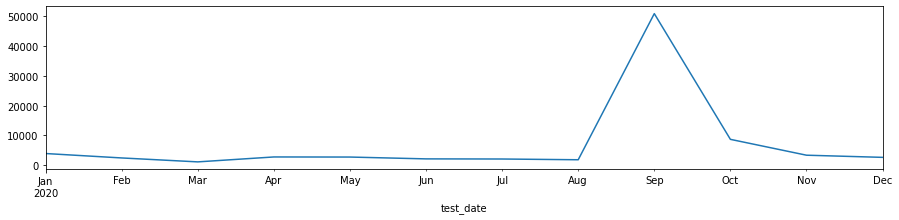

In [ ]:
monthly = dates.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))

In [ ]:
print('Number of rows in original dataset = %d' % (data.shape[0]))

data = data.dropna()
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original dataset = 824579
Number of rows after discarding missing values = 822478


PCA is not applied to the dataset since its variables are all categorical. This is drawn from the following source: https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6#:~:text=While%20it%20is%20technically%20possible,not%20apply%20PCA%20to%20them.


Encoding the 'gender' and 'test_indication' features:

In [ ]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,male,Other,0
1,0,0,0,0,0,0,male,Other,0
2,0,0,0,0,0,0,female,Other,0
3,0,0,0,0,0,0,male,Other,0
4,0,0,0,0,0,0,male,Other,0
...,...,...,...,...,...,...,...,...,...
824574,0,0,0,0,0,0,female,Other,1
824575,0,0,0,0,0,0,female,Other,1
824576,0,0,0,0,1,0,male,Other,1
824577,0,0,0,0,0,0,male,Contact with confirmed,1


In [ ]:
# Encoding categorical variables
from sklearn import preprocessing
import numpy as np

enc = preprocessing.OrdinalEncoder()
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,1,Other,0
1,0,0,0,0,0,0,1,Other,0
2,0,0,0,0,0,0,0,Other,0
3,0,0,0,0,0,0,1,Other,0
4,0,0,0,0,0,0,1,Other,0


female -> 0
male -> 1

In [ ]:
data['test_indication'] = data['test_indication'].astype('category')
data['test_indication'] = data['test_indication'].cat.codes
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,1,2,0
1,0,0,0,0,0,0,1,2,0
2,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,1,2,0
4,0,0,0,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...
824574,0,0,0,0,0,0,0,2,1
824575,0,0,0,0,0,0,0,2,1
824576,0,0,0,0,1,0,1,2,1
824577,0,0,0,0,0,0,1,1,1


Abroad-> 0; Contact_with_confirmed-> 1; Other-> 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822478 entries, 0 to 824578
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cough                822478 non-null  int64 
 1   fever                822478 non-null  int64 
 2   sore_throat          822478 non-null  int64 
 3   shortness_of_breath  822478 non-null  int64 
 4   head_ache            822478 non-null  int64 
 5   age_60_and_above     822478 non-null  object
 6   gender               822478 non-null  int8  
 7   test_indication      822478 non-null  int8  
 8   corona_result        822478 non-null  int64 
dtypes: int64(6), int8(2), object(1)
memory usage: 51.8+ MB


'age_60_and_above' is stored as type object. Hence, it needs to be converted to type integer.

In [ ]:
# training_data['age_60_and_above'] = pd.to_numeric(training_data['age_60_and_above'])
data['age_60_and_above'].unique()

array(['0', '_', '1'], dtype=object)

'age_60_and_above' has values _ that need to be dropped.

In [ ]:
data = data[data['age_60_and_above'] != '_']
data['age_60_and_above'].unique()

array(['0', '1'], dtype=object)

In [ ]:
data['age_60_and_above'] = pd.to_numeric(data['age_60_and_above'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782628 entries, 0 to 824578
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   cough                782628 non-null  int64
 1   fever                782628 non-null  int64
 2   sore_throat          782628 non-null  int64
 3   shortness_of_breath  782628 non-null  int64
 4   head_ache            782628 non-null  int64
 5   age_60_and_above     782628 non-null  int64
 6   gender               782628 non-null  int8 
 7   test_indication      782628 non-null  int8 
 8   corona_result        782628 non-null  int64
dtypes: int64(7), int8(2)
memory usage: 49.3 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_features = data.iloc[:, :-1]
data_features_np = data_features.to_numpy()
data_features_np

array([[0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
data_labels = data.iloc[:, -1]
data_labels_np = data_labels.to_numpy()
data_labels_np

array([0, 0, 0, ..., 1, 1, 1])

# **SPLITTING DATASET**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split

In [ ]:
[x_train, x_test, y_train, y_test] = train_test_split(data_features_np, data_labels_np, test_size=0.2)
x_train, x_test, y_train, y_test = x_train[:21], x_test[:21], y_train[:21], y_test[:21]
[x_train, x_test, y_train, y_test] = [x_train, x_test, y_train, y_test]
print(x_train, x_test, y_train, y_test, sep="\n")

# **DECISION TREE CLASSIFIER** 

Training Accuracy =  0.9191633312144027
Testing Accuracy =  0.9190741474259867
y_predicted =  [0 0 0 ... 0 0 0]
y_test =  [0 0 0 ... 0 0 1]
Training Accuracy =  0.9192415932228295
Testing Accuracy =  0.9183075016291223
y_predicted =  [0 0 0 ... 0 0 0]
y_test =  [0 0 0 ... 0 0 0]
Training Accuracy =  0.9189684747852587
Testing Accuracy =  0.9198663480827466
y_predicted =  [0 0 0 ... 1 0 0]
y_test =  [0 0 0 ... 1 0 0]
Training Accuracy =  0.9192479819582113
Testing Accuracy =  0.9187483229623193
y_predicted =  [0 0 0 ... 0 0 0]
y_test =  [0 0 1 ... 0 0 0]
Training Accuracy =  0.9192958974735745
Testing Accuracy =  0.9180327868852459
y_predicted =  [0 0 0 ... 0 0 0]
y_test =  [1 0 0 ... 0 0 0]
Training Accuracy =  0.9193150636797199
Testing Accuracy =  0.9184991630783385
y_predicted =  [0 0 1 ... 0 0 0]
y_test =  [0 0 1 ... 0 0 0]
Training Accuracy =  0.9191585396628664
Testing Accuracy =  0.9190677587110129
y_predicted =  [0 0 0 ... 0 0 0]
y_test =  [0 0 0 ... 0 0 0]
Training Accuracy = 

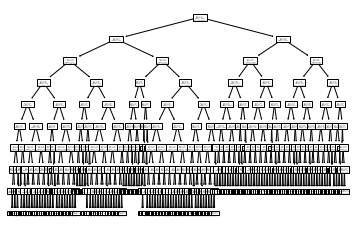

In [ ]:
clf = DecisionTreeClassifier()

#sum_training_acc = 0
#sum_testing_acc = 0

from statistics import stdev

lst_train = []
lst_test = []

for i in range(10):
  [x_train, x_test, y_train, y_test] = train_test_split(data_features_np, data_labels_np, test_size=0.2)

  clf.fit(x_train,y_train)
  tree.plot_tree(clf)

  print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
  print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

  y_predicted = clf.predict(x_test)
  print("y_predicted = ", y_predicted)
  print("y_test = ", y_test)

  #sum_training_acc = sum_training_acc + clf.score(X_train,y_train)
  #sum_testing_acc = sum_testing_acc + clf.score(X_test,y_test)

  lst_train.append(clf.score(x_train,y_train))
  lst_test.append(clf.score(x_test,y_test))

print("Average Training Accuracy = ", sum(lst_train)/10)
print("Average Testing Accuracy = ", sum(lst_test)/10)

print('Standard deviation of training accuracies = ', stdev(lst_train))
print('Standard deviation of testing accuracies = ', stdev(lst_test))

Training Accuracy =  0.9192431904066749
Testing Accuracy =  0.9187611003922671
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


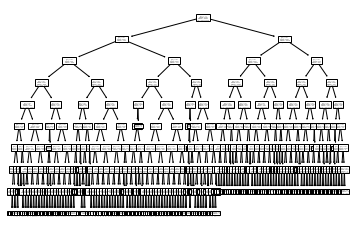

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy")

[x_train, x_test, y_train, y_test] = train_test_split(data_features_np, data_labels_np, test_size=0.2)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

In [ ]:
results_dict_train = {}
results_dict_test = {}

Training Accuracy =  0.9192431904066749
Testing Accuracy =  0.9187611003922671
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


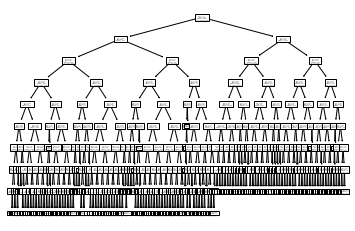

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini")

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

results_dict_train[2] = clf.score(x_train,y_train)*100
results_dict_test[2] = clf.score(x_test,y_test)*100

In [ ]:
len(x_train)

626102

Training Accuracy =  0.9192208298328387
Testing Accuracy =  0.918818598827032
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


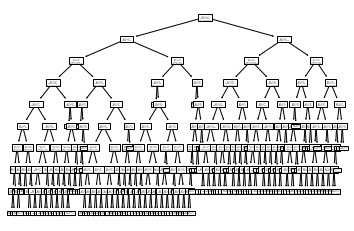

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=100)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

results_dict_train[100] = clf.score(x_train,y_train)*100
results_dict_test[100] = clf.score(x_test,y_test)*100

Training Accuracy =  0.9191824974205481
Testing Accuracy =  0.918818598827032
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


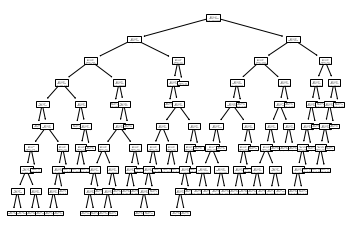

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=1000)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

results_dict_train[1000] = clf.score(x_train,y_train)*100
results_dict_test[1000] = clf.score(x_test,y_test)*100

Training Accuracy =  0.9192192326489933
Testing Accuracy =  0.918818598827032
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


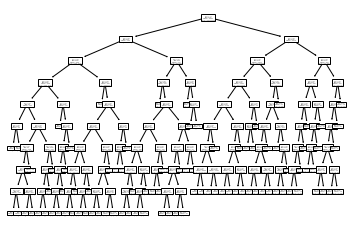

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=500)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

results_dict_train[500] = clf.score(x_train,y_train)*100
results_dict_test[500] = clf.score(x_test,y_test)*100

Training Accuracy =  0.9192192326489933
Testing Accuracy =  0.918818598827032
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


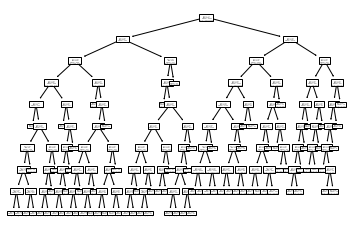

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=600)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

results_dict_train[600] = clf.score(x_train,y_train)*100
results_dict_test[600] = clf.score(x_test,y_test)*100

Training Accuracy =  0.9192192326489933
Testing Accuracy =  0.918818598827032
y_predicted =  [0 0 0 ... 0 1 1]
y_test =  [0 0 0 ... 0 1 0]


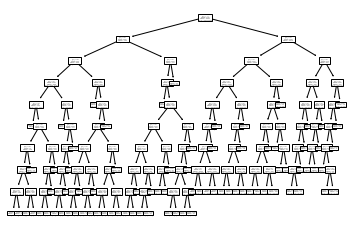

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=600)

clf.fit(x_train,y_train)
tree.plot_tree(clf)

print("Training Accuracy = ", clf.score(x_train,y_train)) #training accuracy
print("Testing Accuracy = ", clf.score(x_test,y_test)) #testing accuracy

y_predicted = clf.predict(x_test)
print("y_predicted = ", y_predicted)
print("y_test = ", y_test)

Upon splitting the gini-based decision tree based on min_samples_split for the values 1000, 100, 500, and 600, the model with min_samples_split = 600 performed the best based on training and testing accuracy.

The model performs the same for both gini and entropy based decision tree 
classifiers.

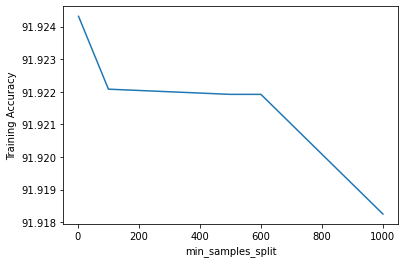

In [ ]:
results_df_train = pd.Series(data=results_dict_train.values(), index=results_dict_train.keys())
results_df_train = results_df_train.sort_index()
results_df_train.plot(xlabel="min_samples_split", ylabel="Training Accuracy")

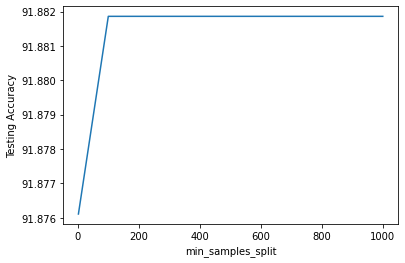

In [ ]:
results_df_test = pd.Series(data=results_dict_test.values(), index=results_dict_test.keys())
results_df_test = results_df_test.sort_index()
results_df_test.plot(xlabel="min_samples_split", ylabel="Testing Accuracy")

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_pred=knn.predict (x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print("Training F1-score = ", knn.score(x_train,y_train))
print("Testing F1-score = ", knn.score(x_test,y_test))
#Support: Number of occurances of of y_true

Training F1-score =  0.9187720211722691
Testing F1-score =  0.9184352759285997


In [ ]:
from sklearn.metrics import classification_report
target_names = ['COVID - ', 'COVID + ']#optional
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    COVID -        0.93      0.98      0.96    140032
    COVID +        0.68      0.42      0.52     16494

    accuracy                           0.92    156526
   macro avg       0.81      0.70      0.74    156526
weighted avg       0.91      0.92      0.91    156526



In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[136825,   3207],
       [  9560,   6934]])

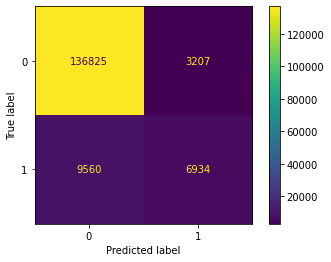

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= knn.classes_)
disp.plot()

In [ ]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1) #pos_label is the label for the positive class
#remember if you have a multi-class problem, the class of interest will be considered the positive class and the rest are negatives

In [ ]:
metrics.auc(fpr, tpr)

0.6987466935617994

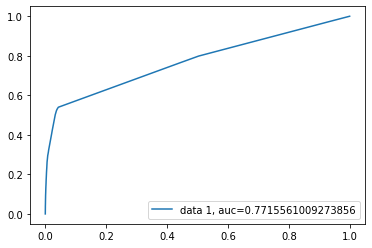

In [ ]:
y_pred_proba = clf.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
nn_y_pred = model.predict(x_test)
nn_y_pred = nn_y_pred.reshape(-1, 1)

In [ ]:
model.score(x_test,y_test)

0.9133818023842685

Makes sense for NB to perform worse than decision-trees (although by a small margin) because it takes features to be independent but for example, someone who has fever is likely to have cough and other syptoms simultaneously.

In [ ]:
Misclassfication_Rate = 1 - model.score(x_test,y_test)
print("Misclassfication rate = ", Misclassfication_Rate)

Misclassfication rate =  0.08686096878473859


# PUT MISCLASSIFICATION RATE FOR ALL OTHER MODELS

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10,100]},
    {"kernel": ["linear"],  "C": [1, 10, 50,100]},
    {"kernel": ["poly"], "degree": [2,4,6,8,10], "C": [1, 10,100]},
]

scores = ["f1"]

for score in scores:
    print("#Tuning hyper-parameters in linear,SVM and RBF to find opitmal SVM model using %s as the metric" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores : ")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the training set")
    print("The testing set scores for the optimal SVM model are computed ")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

#Tuning hyper-parameters in linear,SVM and RBF to find opitmal SVM model using f1 as the metric

Best parameters set found on training set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores : 

0.775 (+/-0.552) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.552) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.775 (+/-0.552) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.552) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.775 (+/-0.552) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.552) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.660 (+/-0.555) for {'C': 1, 'kernel': 'linear'}
0.660 (+/-0.555) for {'C': 10, 'kernel': 'linear'}
0.660 (+/-0.555) for {'C': 50, 'kernel': 'linear'}
0.660 (+/-0.555) for {'C': 100, 'kernel': 'linear'}
0.775 (+/-0.552) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.775 (+/-0.552) for {'C': 1, 'degree': 4, 'kernel': 'poly'}
0.775 (+/-0.552) for {'C': 1, 'degree': 6, 'kernel': 'poly'}
0.775 (+/-0.552) for {'C':

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The testing set scores for the optimal SVM model are computed 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter

# try to increase gamma from 1 to 10 to 100

# try to increase C from 1 to 100 to 1000

# Fitting
svc = SVC(kernel='rbf', C=1, gamma=1);

svc.fit(x_train, y_train)

print (svc.score (x_train, y_train)); # print the trainig score (accuracy)

0.9523809523809523


In [ ]:
# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC')
plt.show()

# **FEATURE SELECTION**

In [ ]:
from sklearn import datasets, metrics
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif,f_regression
from sklearn.model_selection import train_test_split

In [ ]:
### You can perform feature selection here using:
#1) SelectKBest
x_train_new = SelectKBest(chi2, k=5).fit_transform(x_train, y_train)
print("Dataset size after feature selection is: ", x_train_new.shape)

Dataset size after feature selection is:  (626102, 5)


Value of k should be less than total number of features and >0

In [ ]:
#2) SelectPercentile
x_train_new_2 = SelectPercentile(chi2, percentile=80).fit_transform(x_train, y_train)
print("Dataset size after feature selection is: ", x_train_new_2.shape)

Dataset size after feature selection is:  (626102, 6)


Since we have only 7 features, percentile is taken as 80.

In [ ]:
#Split arrays or matrices into random train and test subsets
features_train, features_test, labels_train, labels_test = train_test_split(x_train_new, y_train, test_size=0.70, random_state=0)

#Perform classification
from sklearn.svm import SVC
clf = SVC(kernel = "rbf",gamma=0.001)

# We learn the digits on the first half of the digits
clf.fit(features_train, labels_train)

# Now predict the value of the digit on the second half:
predicted = clf.predict(features_test)
#print (clf.score (features_test, labels_test));# print the prediction score(accuracy)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix (labels_test, predicted))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    392265
           1       0.74      0.28      0.41     46007

    accuracy                           0.91    438272
   macro avg       0.83      0.64      0.68    438272
weighted avg       0.90      0.91      0.90    438272


Confusion matrix:
[[387625   4640]
 [ 33026  12981]]


In [ ]:
#Split arrays or matrices into random train and test subsets
features_train, features_test, labels_train, labels_test = train_test_split(x_train_new_2, y_train, test_size=0.70, random_state=0)

#Perform classification
from sklearn.svm import SVC
clf = SVC(kernel = "rbf",gamma=0.001)

# We learn the digits on the first half of the digits
clf.fit(features_train, labels_train)

# Now predict the value of the digit on the second half:
predicted = clf.predict(features_test)
#print (clf.score (features_test, labels_test));# print the prediction score(accuracy)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix (labels_test, predicted))